# Business analysis and user metrics

We've done beautifully in the Practicum course, and we've been offered an internship in the analytical department at Yandex.Afisha. Our first task is to help optimize marketing expenses.

Yandex.Afisha is an online service where people can search and buy tickets for different events such as concerts, theaters, movies, sports, etc. The service is only available for countries in Asia.

When a user enters the site an event is created on the server. The user receives a unique identifier `UID` till the sessions are completed. A session is completed when the user closes the site. If a user places an order an event will be created with the timestamp of the event and the revenue.

We received from our team three tables:
- costs: marketing expenses
- orders: it contains all the orders placed from the users
- visits: the sessions for each user.

The data are from June 2017 through May 2018

<div class="list-group" id="list-tab" role="tablist">
    <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">
        Notebook Content!</h3>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab"
        aria-controls="profile">Import Libraries<span class="badge badge-primary badge-pill">1</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#helper" role="tab"
        aria-controls="profile">Helper Functions<span class="badge badge-primary badge-pill">2</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Step1" role="tab"
        aria-controls="messages">Open the data file and study the general information<span
            class="badge badge-primary badge-pill">3</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#product-analysis" role="tab"
        aria-controls="messages">Product Analysis<span
            class="badge badge-primary badge-pill">4</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#sales-analysis" role="tab"
        aria-controls="messages">Sales Analysis<span
            class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#marketing-analysis" role="tab"
        aria-controls="messages">Marketing Analysis<span
            class="badge badge-primary badge-pill">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Step6" role="tab"
        aria-controls="messages">Final Conclusion<span
            class="badge badge-primary badge-pill">7</span></a>
</div>

### Import libraries and set constants  <a name='libraries'  href='#list-tab'><span>🔼</span></a>

In [1]:
# Libraries
import math
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from IPython.display import display

%matplotlib inline

sns.set_style("whitegrid")

### Helper functions <a name='helper' href='#list-tab'><span>🔼</span></a>

In [2]:
# Some functions to help us latter on specific tasks


def print_stats(df):
    """Shows basic information of the data, also prints a sample"""
    print("A sample of the dataframe")
    display(df.sample(5))
    print("Dataframe Information\n")
    display(df.info())
    print("Description of the features")
    display(df.describe(datetime_is_numeric=True))

### Open the data file and study the general information  <a name='Step1'  href='#list-tab'><span>🔼</span></a>

In [3]:
costs = pd.read_csv(
    "datasets/costs_us.csv",
    dtype={"source_id": "category", "costs": "float32"},
    parse_dates=[1],
)

orders = pd.read_csv(
    "datasets/orders_log_us.csv",
    dtype={"Revenue": "float32", "Uid": "object"},
    parse_dates=[0],
)

visits = pd.read_csv(
    "datasets/visits_log_us.csv",
    dtype={"Device": "category", "Source Id": "category", "Uid": "object"},
    parse_dates=[1, 3],
)

print_stats(costs)
print_stats(orders)
print_stats(visits)

A sample of the dataframe


,source_id,dt,costs
1826,9,2017-06-11,7.270000
1544,5,2017-09-01,119.639999
1465,5,2017-06-14,81.150002
811,3,2017-08-25,156.910004
2153,9,2018-05-06,11.290000


Dataframe Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float32       
dtypes: category(1), datetime64[ns](1), float32(1)
memory usage: 32.7 KB


None

Description of the features


,dt,costs
count,2542,2542.000000
mean,2017-11-29 09:04:57.403619072,129.477539
min,2017-06-01 00:00:00,0.540000
25%,2017-08-30 00:00:00,21.945000
50%,2017-11-29 00:00:00,77.295002
75%,2018-02-28 00:00:00,170.064999
max,2018-05-31 00:00:00,1788.280029
std,NaN,156.296661


A sample of the dataframe


,Buy Ts,Revenue,Uid
6638,2017-09-02 12:58:00,14.18,3644482766749211722
38234,2018-03-05 09:53:00,4.95,16699793745976930410
3128,2017-07-12 13:20:00,1.22,4433726321574845410
26345,2017-12-27 01:53:00,1.07,17959773519886719966
11124,2017-10-06 14:08:00,11.00,9816336762804908708


Dataframe Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float32       
 2   Uid      50415 non-null  object        
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 984.8+ KB


None

Description of the features


,Buy Ts,Revenue
count,50415,50415.000000
mean,2017-12-20 05:14:24.846176768,4.999462
min,2017-06-01 00:10:00,0.000000
25%,2017-10-13 17:28:00,1.220000
50%,2017-12-21 14:12:00,2.500000
75%,2018-03-02 16:10:00,4.890000
max,2018-06-01 00:02:00,2633.280029
std,NaN,21.818167


A sample of the dataframe


,Device,End Ts,Source Id,Start Ts,Uid
292280,desktop,2017-10-21 00:43:00,5,2017-10-21 00:42:00,2291844161150321053
294323,desktop,2018-02-06 10:01:00,4,2018-02-06 10:01:00,10836576906396236389
280370,desktop,2017-11-09 08:14:00,5,2017-11-09 08:14:00,7993036568815318058
315728,desktop,2018-03-30 09:07:00,3,2018-03-30 09:06:00,1868881877982679529
310300,desktop,2018-02-15 15:31:00,4,2018-02-15 15:30:00,9795183701076164774


Dataframe Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  object        
dtypes: category(2), datetime64[ns](2), object(1)
memory usage: 8.9+ MB


None

Description of the features


,End Ts,Start Ts
count,359400,359400
mean,2017-12-18 06:28:15.036205056,2017-12-18 06:17:32.010517760
min,2017-06-01 00:02:00,2017-06-01 00:01:00
25%,2017-10-15 09:45:45,2017-10-15 09:41:00
50%,2017-12-18 18:59:30,2017-12-18 18:46:00
75%,2018-02-28 10:08:15,2018-02-28 09:54:00
max,2018-06-01 01:26:00,2018-05-31 23:59:00


In [4]:
# Change column names
orders.columns = ["buy_ts", "revenue", "uid"]
visits.columns = ["device", "end_ts", "source_id", "start_ts", "uid"]

### Conclusion

We have three tables:

**Table name: costs**
- source_id — ad source identifier
- dt — date
- costs — expenses on this ad source on this day

**Table name: orders**
- uid — unique identifier of the user making an order
- buy_ts — order date and time
- revenue — Yandex.Afisha's revenue from the order

**Table name: visits**
- Uid — user's unique identifier
- Device — user's device
- Start Ts — session start date and time
- End Ts — session end date and time
- Source Id — identifier of the ad source the user came from

After viewing each table we see that:

- Costs table has 2542 entries and the date range is right. Costs variance is high.
- We have 50415 orders placed in one year. Column names have to be changed to more convenient ones.
- In one year we have 359400 visits. Column names have to be changed to more convenient ones.

### Analysis: Make reports and calculate metrics

## Product <a name='product-analysis'  href='#list-tab'><span>🔼</span></a>

**How many people use it every day, week, and month?**

Here we talk about the vanity metrics, `DAU`, `WAU`, `MAU`. This metrics shows the number of active unique users in `days`, `weeks`, and `months` respectively. These metrics won't help us make serious decisions but will help us trigger the motivation of our audience.

In [5]:
mau = visits.groupby(visits["start_ts"].dt.to_period("M")).nunique()["uid"]
wau = visits.groupby(visits["start_ts"].dt.to_period("W")).nunique()["uid"]
dau = visits.groupby(visits["start_ts"].dt.to_period("D")).nunique()["uid"]

display(dau.head())
display(wau.head())
display(mau.head())

start_ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Freq: D, Name: uid, dtype: int64

start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: uid, dtype: int64

start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64

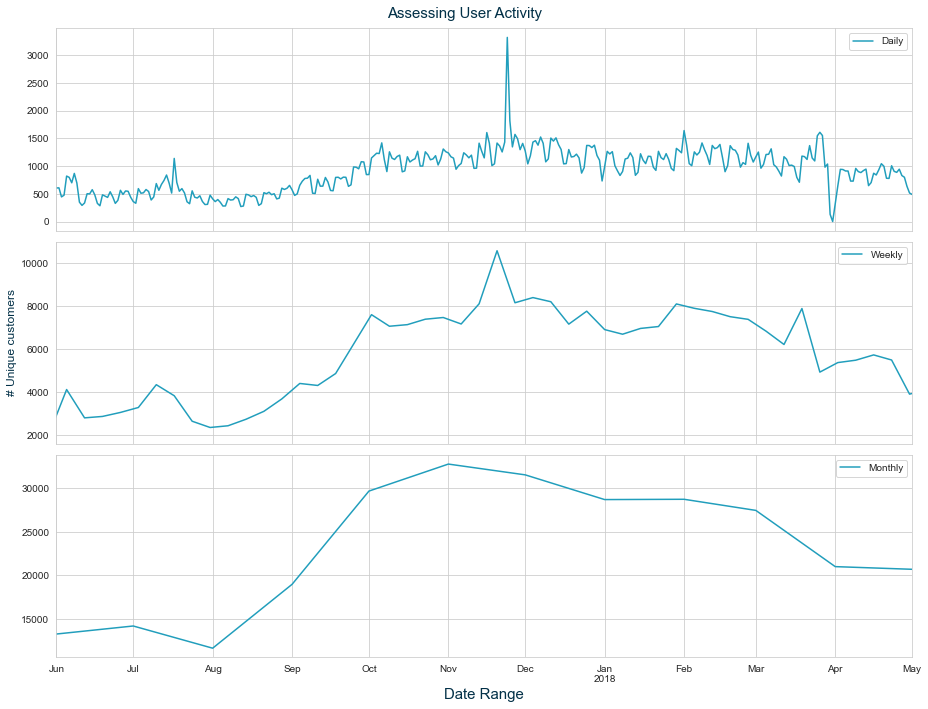

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(13, 10), sharex=True)
fig.suptitle("Assessing User Activity", size=15, color="#023047")
dau.plot(ax=axes[0], color="#219ebc", label="Daily", legend=True, grid=True)
wau.plot(ax=axes[1], color="#219ebc", label="Weekly", legend=True, grid=True)
mau.plot(ax=axes[2], color="#219ebc", label="Monthly", legend=True, grid=True)
plt.xlabel("Date Range", size=15, color="#023047")
axes[1].set_ylabel("# Unique customers", size=12, color="#023047")
plt.tight_layout()

In [7]:
# Calculate the average metrics
dau_avg = int(dau.mean())
wau_avg = int(wau.mean())
mau_avg = int(mau.mean())

sticky_factor_week = dau_avg / wau_avg * 100
sticky_factor_month = dau_avg / mau_avg * 100

print(
    f"DAU:{dau_avg}, WAU: {wau_avg}, MAU: {mau_avg}\nWeekly sticky factor: {round(sticky_factor_week, 2)}\nMonthly sticky factor: {round(sticky_factor_month, 2)}"
)

DAU:907, WAU: 5716, MAU: 23228
Weekly sticky factor: 15.87
Monthly sticky factor: 3.9


### Conclusion

On average we have every:
- Day: 907 unique active users
- Week: 5716 unique active users
- Monthly: 23228 unique active users

Looking at the graphs we see that:
- The daily user visits don't vary much. We have a peak around the Christmas holidays where users probably buy more tickets for events and a drop after March. This is a typical seasonality response. 
- The weekly sticky factor shows us that only 16% of the users stay the same and the rest 84% are new users.
- Same for the monthly sticky factor, only 4% of the users are users from previous months and the rest of the 96% are new users!

*Note: The sticky factor represents only the current period. In general, doesn't show a development in sales or a growth in the company and has always to be compared with other metrics*

**How many sessions are there per day? (One user might have more than one session.)**

In [8]:
# Ckeck if there are values where the end of the session is smaller from the srart of the session
visits.loc[visits["end_ts"] < visits["start_ts"], :]

,device,end_ts,source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Ok, two sessions fulfill this criterion. Looking closely we see that the 25 of March 2018 was the date that time was changed to daylight saving time. So the sessions ended one hour later but due to the change, we have this anomaly. We can easily fix this.

In [9]:
# Take the indexes
daylight_indexes = visits.loc[visits["end_ts"] < visits["start_ts"], :].index

# Add one hour to these values
visits.loc[visits.index.isin(daylight_indexes), "end_ts"] = visits.iloc[
    daylight_indexes
]["end_ts"] + pd.Timedelta(1, "hour")

# Check if the changes took place
assert all(visits["end_ts"] >= visits["start_ts"])


In [10]:
# Calculate the number of sessions for each day
sessions_users_day = visits.groupby(visits["start_ts"].dt.to_period("D")).agg(
    {"uid": ["count", "nunique"]}
)

# Change the column names
sessions_users_day.columns = ["n_sessions", "n_users"]

# Calculate the sessions per user
sessions_users_day["sessions_per_user"] = (
    sessions_users_day["n_sessions"] / sessions_users_day["n_users"]
)

display(sessions_users_day.head(5))
display(sessions_users_day.tail(5))

,n_sessions,n_users,sessions_per_user
start_ts,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


,n_sessions,n_users,sessions_per_user
start_ts,,,
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772
2018-05-30,1410,1289,1.093871
2018-05-31,2256,1997,1.129695


**What is the length of each session?**

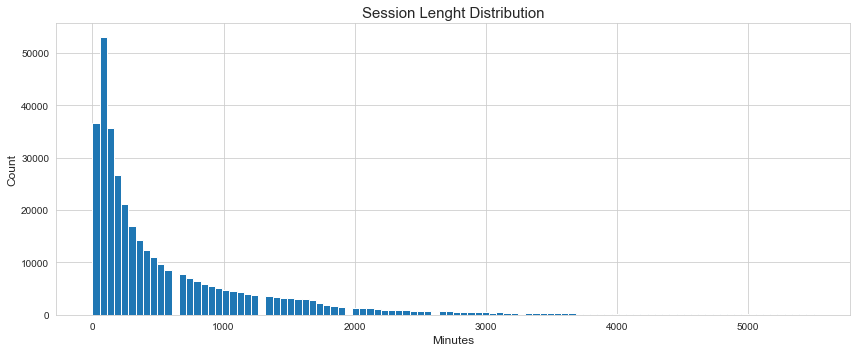

In [11]:
# Calculate the difference in seconds
asl = (visits["end_ts"] - visits["start_ts"]).dt.seconds

# Plot the data

fig, ax = plt.subplots(figsize=(12,5))
asl.hist(bins=100, range=(0, 5500))
plt.title('Session Lenght Distribution', size=15)
plt.xlabel('Minutes',size=12)
plt.ylabel('Count', size=12)
plt.tight_layout()
plt.show()

As the value is not normally distributed we can't use the average as a descriptive statistic of the center, it would be heavily affected by the outliers. We are going to use `mode`, which is the most frequent value.

In [12]:
asl_metric = asl.mode()
print(f"The most frequent lenght of a session is {asl_metric[0]} seconds")

The most frequent lenght of a session is 60 seconds


**How often do users come back?**

In [13]:
def cohort_table_v2(
    dataframe, column_date, column_id, time="week", show_category=False, category=None
):
    """
    A function that takes a dataframe and return the cohorts for a specific event. Also a heatmap of the 
    retention is plotted
    """

    # Make a copy of the original dataframe, we dont want all the new coulmns to be added on our original table
    df = dataframe.copy()

    # Calculate the first event of each user
    df["first_event"] = pd.to_datetime(
        df.groupby([column_id])[column_date].transform("min").dt.date
    )

    # Here we calclulate the lifetime of each event
    if time == "week":
        # WEEK
        df[f"cohort_{time}"] = df["first_event"].dt.to_period("w")
        df[f"event_{time}"] = df[column_date].dt.to_period("w")
    else:
        # MONTH
        df[f"cohort_{time}"] = df["first_event"].dt.to_period("m")
        df[f"event_{time}"] = df[column_date].dt.to_period("m")

    # LIFETIME
    df["lifetime"] = df[f"event_{time}"].astype("int") - df[f"cohort_{time}"].astype(
        "int"
    )

    # COHORTS

    if show_category:
        cohorts = (
            df.groupby([f"cohort_{time}", "lifetime", category])
            .agg({column_id: "nunique"})
            .reset_index()
        )

        # FIRST USERS
        first_users = cohorts.query("lifetime==0")[
            [f"cohort_{time}", column_id, category]
        ]
        first_users = first_users.rename(columns={column_id: "cohort_users"})

        # MERGE
        cohorts = cohorts.merge(first_users, on=[f"cohort_{time}", category])

    else:
        cohorts = (
            df.groupby([f"cohort_{time}", "lifetime"])
            .agg({column_id: "nunique"})
            .reset_index()
        )

        # FIRST USERS
        first_users = cohorts.query("lifetime==0")[[f"cohort_{time}", column_id]]
        first_users = first_users.rename(columns={column_id: "cohort_users"})

        # MERGE
        cohorts = cohorts.merge(first_users, on=f"cohort_{time}")

        display(df.head(10))
        display(cohorts.head(10))

    # RETENTION
    cohorts["retention"] = cohorts[column_id] / cohorts["cohort_users"]

    if show_category:

        # RETENTION PIVOT
        retention_pivot = cohorts.pivot_table(
            index=["device"], columns="lifetime", values="retention"
        )

    else:

        # RETENTION PIVOT
        retention_pivot = cohorts.pivot_table(
            index=[f"cohort_{time}"], columns="lifetime", values="retention"
        )

        display(retention_pivot)

    # PLOT PIVOT
    plt.figure(figsize=(15, 9))
    plt.title("Cohorts: User Retention", size=15, color="#023047")
    sns.heatmap(
        retention_pivot,
        annot=True,
        fmt=".1%",
        linewidths=1,
        linecolor="gray",
        cmap="icefire",
        annot_kws={"rotation": 0, "size": 10},
    )

    plt.yticks(rotation=0)
    plt.ylabel("Cohort", size=15, color="#023047")
    plt.xlabel("Lifetime", size=15, color="#023047")
    plt.tight_layout()

    plt.show()

,device,end_ts,source_id,start_ts,uid,first_event,cohort_month,event_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09,2018-03,2018-05,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12,2017-12,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-09,2017-09,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2017-06-29,2017-06,2018-01,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017-11,2017-11,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017-07,2017-07,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017-11,2017-11,0


,cohort_month,lifetime,uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259
5,2017-06,5,947,13259
6,2017-06,6,809,13259
7,2017-06,7,766,13259
8,2017-06,8,694,13259
9,2017-06,9,674,13259


lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


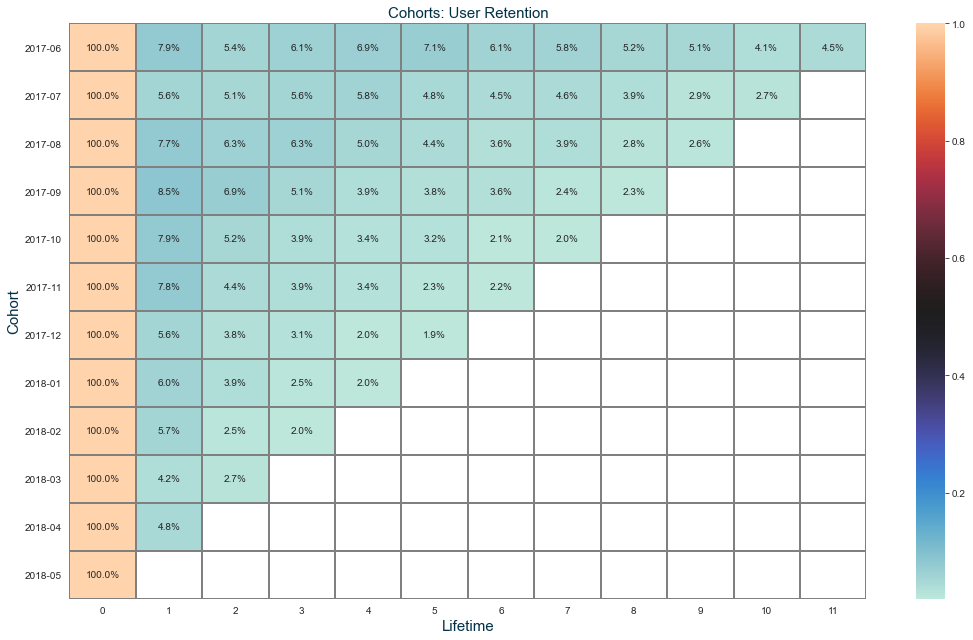

In [14]:
# Plot the cohorts
cohort_table_v2(visits, "start_ts", "uid", time="month")

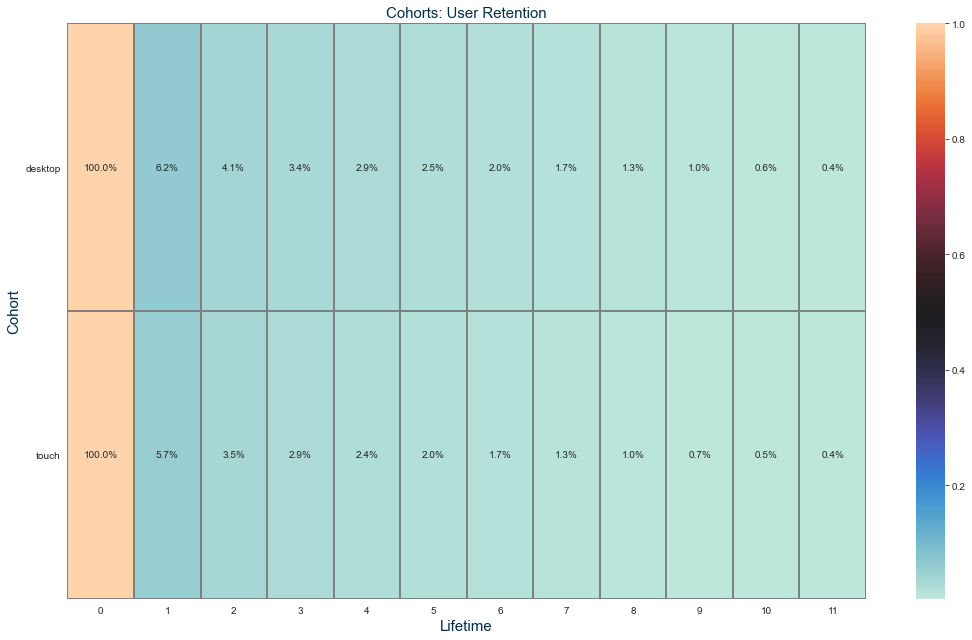

In [15]:
# Plot the cohorts depending on the category device
cohort_table_v2(
    visits, "start_ts", "uid", time="month", show_category=True, category="device"
)

### Conclusion

In this section, we calculate metrics for our product/web page. We analyze the visits table and calculate useful metrics such as `Daily Active Users`, `Weekly Active Users`, `Monthly Active Users` also we saw the `Sticky factors` and finally see the most important metric yet the `Retention rate`.

More specific:

- We have each day, 907 new users on average visiting our site
- Weekly the number is even bigger with 5716 unique users
- Monthly average of unique users exceeds 23000.
- The most frequent duration of a session is 60 seconds.

This behavior shows that the site each day attracts new users but what happens with the users that already registered to our services and use already our product.? To answer this we have calculated the sticky factors.

- Weekly sticky factor is almost 16% where monthly barely reaches 4%

This translates to only 4% of the old users use our services each month and 16% each week.

To understand better this behavior and also prove if this is the case we calculated the retention rate. A metric that compares the number of users using our services in specific periods from their first use.

- The heatmap shows that the monthly sticky factor we calculated earlier is accurate. Looking at the percentages for each cohort's lifetime on average is close to 4%

- We plotted only the monthly cohorts as the weekly are quite cluttered to see on a heatmap

- The heatmap of the devices shows that users using a desktop have higher retention. Maybe our site needs some improvements to run on touch devices such as tablets.

To conclude these numbers seem that our users come back not so oft. As a website selling tickets for different events, we may have users using our services only when their favorite band is playing or when a specific film makes a premier. This can explain the small retention rate for each month. As a band or a film can be seen only once a month.

## Sales <a name='sales-analysis'  href='#list-tab'><span>🔼</span></a>

**When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)**

To solve this we have to calculate the difference between the time a user visited the site and the first time a purchase was placed.

,uid,start_ts,buy_ts,conversion_time
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00,13
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00,0
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00,0
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00,0
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00,0


count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_time, dtype: float64

<ipython-input-16-9dc778b61cff>:12: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  merged.hist(bins=100, ax=ax)


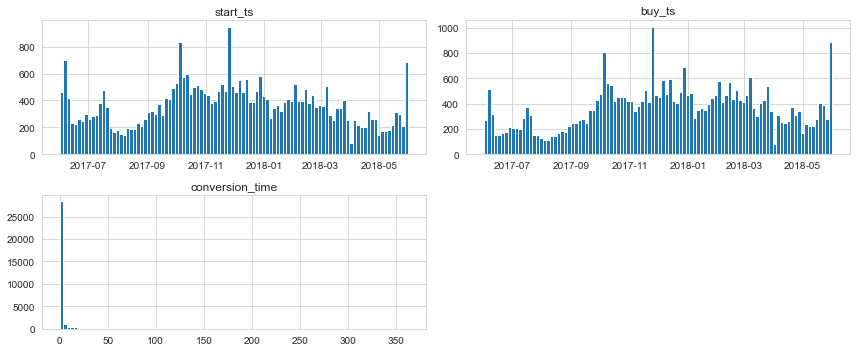

In [16]:
orders_group = orders.groupby("uid").agg({"buy_ts": "min"}).reset_index()
visits_group = visits.groupby(["uid"]).agg({"start_ts": "min"}).reset_index()

merged = visits_group.merge(orders_group, on="uid")
merged["conversion_time"] = (merged["buy_ts"] - merged["start_ts"]).dt.days

display(merged.head())
display(merged["conversion_time"].describe())

# Plot the data
fig, ax = plt.subplots(figsize=(12,5))
merged.hist(bins=100, ax=ax)
plt.title('Conversion Interval', size=15)
plt.xlabel('#Days',size=12)
plt.ylabel('Count', size=12)
plt.tight_layout()
plt.show()

Till now we succeed to calculate the difference in days from the first visit to the first buy. Looking closely at this feature we see that the average conversion time is about 17 days. But looking at the skewness of the data we can see that taking the mean is not accurate as doesn't represent the middle of our data. We can take the median or the most frequent value and that is 0

Interestingly enough minimum is 0. This is the case that people bought something the first day they visited our site.

The median is 0 days this shows how skewed the data are, and the median is smaller than the mean shows that data are right-tailed, with more users being converted to customers on the same day (0 days)

Only 25% of the users are converted to customers after 2 days with a max to be so close to one year

Let's make some deeper analysis of this feature

In [17]:
merged_visits = visits.merge(merged[["uid", "conversion_time"]], on="uid")

# How conversion time changes for each device
conversion_rate_device = merged_visits.pivot_table(
    index="device", values="conversion_time", aggfunc=["median", "count"],
)

conversion_rate_device.columns = ["median", "count"]


# How conversion time changes for each ad source
conversion_rate_ad_source = merged_visits.pivot_table(
    index="source_id", values="conversion_time", aggfunc=["median", "count"]
)
conversion_rate_ad_source.columns = ["median", "count"]

display(conversion_rate_device.sort_values("median"))
display(conversion_rate_ad_source.sort_values("count", ascending=False))

,median,count
device,,
desktop,0,78158
touch,1,19236


,median,count
source_id,,
4,0.0,22011
2,5.0,19063
3,0.0,18001
1,4.0,16153
5,0.0,14808
9,2.5,4794
10,0.0,2563
7,0.0,1
6,NaN,0


Interesting findings:

- Desktop users converted quicker to buyers than the users of touch devices, with a difference of almost 1 day
- The ad sources with id 6, 7 didn't convert any users in a year
- Ad sources 4, 2, 3 are the top three in a matter of customer flow but the source with id 2 has a conversion time of 5 days on average
- Ad source 1, 2 may need some optimization as convert users slower than the other sources.

In [18]:
# Create buckets for each customer depending on their conversion time
buckets = {
    0: "QuickBuyer",
    7: "WeekBuyer",
    14: "TwoWeeks",
    21: "ThreeWeek",
    30: "Month",
    60: "TwoMonths",
    120: "ThreeMonths",
}


def apply_cat(df):
    conversion_time = df["conversion_time"]
    other = "other"

    for t, c in buckets.items():
        if conversion_time <= t:
            return c
    return other


# Apply the function
merged["buyer_cat"] = merged_visits.apply(apply_cat, axis=1)

In [19]:
merged_orders = orders.merge(merged, on="uid")

# We aggregate the data by user id and buyer category, and calculate the cumulative revenue for each user and the total number of buys
grouped = (
    merged_orders.groupby(["uid", "buyer_cat"])
    .agg({"revenue": ["sum", "count"]})
    .reset_index()
)
grouped.columns = ["uid", "buyer_cat", "revenue_sum", "total_buy"]
display(grouped.head(10))

,uid,buyer_cat,revenue_sum,total_buy
0,10000837700716403746,QuickBuyer,2.20,1
1,10000997030965831953,QuickBuyer,1.83,1
2,10001199569370567060,QuickBuyer,1.00,2
3,10002243978166172255,QuickBuyer,17.41,4
4,10003351403065971701,QuickBuyer,6.72,1
5,10003425910527970929,QuickBuyer,1.34,1
6,10003843789561818935,QuickBuyer,0.03,1
7,10003858247064282365,QuickBuyer,1.89,2
8,10003922165532733227,QuickBuyer,9.17,1
9,10004355444061692288,QuickBuyer,11.00,2


What this table shows is the unique users with their categories and their revenue for the whole year. This way we can know calculate the worth for each converted user to a buyer depending on their respective category they belong to.

In [20]:
categories = list(buckets.values())
categories.append("other")

In [ ]:
pivot = grouped.pivot_table(
    index="buyer_cat",
    values=["revenue_sum", "total_buy"],
    aggfunc={"revenue_sum": "sum", "total_buy": "sum"},
)

display(pivot)

fig, axes = plt.subplots(2, 1, figsize=(12, 9))

sns.barplot(
    data=grouped,
    y="revenue_sum",
    x="buyer_cat",
    order=categories,
    ax=axes[0],
    estimator=sum,
)

sns.barplot(
    data=grouped,
    y="total_buy",
    x="buyer_cat",
    order=categories,
    ax=axes[1],
    estimator=sum,
)

# Set titles
axes[0].set_title("Total yearly revenue return", size=15)
axes[1].set_title("Total purchases in a year", size=15)

# Name axis
axes[0].set_xlabel("Buyer categories", size=12)
axes[1].set_xlabel("Buyer categories", size=12)

axes[0].set_ylabel("Cumulative revenue in $", size=12)
axes[1].set_ylabel("# of total purchases", size=12)


plt.xticks(rotation=90)
plt.tight_layout()

,revenue_sum,total_buy
buyer_cat,,
Month,19895.300781,2191
QuickBuyer,73101.468750,15594
ThreeMonths,46823.128906,7213
ThreeWeek,14082.209961,2712
TwoMonths,20159.750000,4620
TwoWeeks,10690.250000,2511
WeekBuyer,38577.640625,8591
other,28727.449219,6983


The bar plots show very clearly:

-  Quick buyers (customers they converted the same day of their visit) are the main source of income as they are the dominant category in both size and revenue

- The buyers that turned in a week have completely different behavior from the quick buyers although they have some days difference in conversion. This category doesn't seem to bring much revenue in comparison with the quick buyers and also the size of this group is almost half of the previous category.

- The next category worth mention is the three months conversion category. These customers over half of the yearly revenue from the dominant category although the size is two times smaller than the quick buyers. So this group of people worth a deeper investigation.

In [ ]:
pivot = grouped.pivot_table(
    index="buyer_cat", values="revenue_sum", aggfunc=["mean", "sum"]
)
pivot.columns = ["mean", "sum"]
pivot.reset_index(inplace=True)


fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(
    data=pivot, x="mean", y="sum", hue="buyer_cat", ax=ax, hue_order=categories
)
plt.legend(title="title", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Relation between mean and sum of revenue for each buyer category", size=15)
plt.xlabel('Mean of yearly revenue', size=12)
plt.ylabel('Sum of yearly revenue', size=12)
plt.tight_layout()

Here we can see how each buyer category is grouped depending on the relationship between average revenue and total revenue. As we noticed before Quick Buyers stand out with high return but small average value. This means small purchases but a big quantity. While Three Month Buyers balance between high average revenue and a moderate number of purchases.

**How many orders do they make during a given period of time?**

In [ ]:
orders_per_day = orders.groupby(orders["buy_ts"].dt.to_period("D"))["uid"].count()
fig, axes = plt.subplots(1, 1, figsize=(18, 6))
fig.suptitle("Orders per day", size=15, color="#023047")
orders_per_day.plot(ax=axes, color="#219ebc")
plt.xlabel("Days", size=12)
plt.ylabel('#Orders', size=12)
plt.show()

print(f"Average ammount of orders per day: {orders_per_day.mean()}")
print(f"Max ammount of orders per day: {orders_per_day.max()}")
print(f"Min ammount of orders per day: {orders_per_day.min()}")

Plotting the number of orders per day shows that orders peak around holidays with a max of 814 orders in one day around the Christmas holidays. This behavior is alike to the user daily activity that we plotted earlier.

**What is the average purchase size?**

In [ ]:
average_revenue_per_day = orders.groupby(orders["buy_ts"].dt.to_period("D"))[
    "revenue"
].mean()

fig, axes = plt.subplots(1, 1, figsize=(18, 6))
fig.suptitle("Average revenue per day", size=15, color="#023047")
average_revenue_per_day.plot(ax=axes, color="#219ebc")
plt.ylabel('Average revenue in $', size=12)
plt.xlabel("Days", size=12)
plt.show()


print(f"Average revenue: {average_revenue_per_day.mean()}")
print(f"Max revenue: {average_revenue_per_day.max()}")
print(f"Min revenue: {average_revenue_per_day.min()}")

The average purchase is 5$ for most of the days, with this value to be 6 times bigger around the Christmas holidays

**How much money do they bring? (LTV)**

In [ ]:
first_orders = orders.groupby("uid").agg({"buy_ts": "min"}).reset_index()
first_orders.columns = ["uid", "first_order_month"]
first_orders["first_order_month"] = first_orders["first_order_month"].dt.to_period("M")

cohort_sizes = (
    first_orders.groupby("first_order_month").agg({"uid": "nunique"}).reset_index()
)
cohort_sizes.columns = ["first_order_month", "n_buyers"]

orders_ = pd.merge(orders, first_orders, on="uid")
orders_["buy_ts"] = orders_["buy_ts"].dt.to_period("M")
cohorts = (
    orders_.groupby(["first_order_month", "buy_ts"])
    .agg({"revenue": "sum"})
    .reset_index()
)


report = pd.merge(cohort_sizes, cohorts, on="first_order_month")

report["age"] = report["buy_ts"].astype("int") - report["first_order_month"].astype(
    "int"
)

report["ltv"] = report["revenue"] / report["n_buyers"]


output = report.pivot_table(
    index="first_order_month", columns="age", values="ltv", aggfunc="mean"
).cumsum(axis=1)

display(output)

plt.figure(figsize=(15, 9))
sns.heatmap(output, annot=True, fmt=".2f", cmap="icefire")
plt.yticks(rotation=0)
plt.title('LTV',size=15)
plt.ylabel("Cohort", size=15, color="#023047")
plt.xlabel("Lifetime", size=15, color="#023047")
plt.tight_layout()

plt.show()

The Lifetime Value (LTV) for July and September cohort seems to be the most profitable as the customers in these cohorts cumulate more revenue than other cohorts.

### Conclusion

What we learned analyzing the sales data:

- 95% of the users converted to buyers under 2 days. The most frequent conversion time is 0 days
- Desktop users converted on average a day earlier than users with touch devices
- The most interesting buy behavior has the users that are converted the same day of visit and those that converted three months later.
- We have around 140 orders per day and when holidays arriving we reach 800
- Average revenue per day is 5\\$ and we reach the 20\\$ around holidays

## Marketing <a name='marketing-analysis'  href='#list-tab'><span>🔼</span></a>

**How much money was spent? Overall/per source/over time**

In [ ]:
# Overall
print(f"Overall money spent in ads: {costs['costs'].sum()}")

# Per source
per_source = (
    costs.groupby("source_id")["costs"]
    .sum()
    .reset_index()
    .sort_values("costs", ascending=False)
)
display(per_source)

# Per month
per_day = costs.groupby(costs["dt"].dt.to_period("m"))["costs"].sum()
# per_day.plot()
# plt.show()

fig, axes = plt.subplots(figsize=(18, 6))
fig.suptitle("Total costs per Day", size=15, color="#023047")
per_day.plot(ax=axes, color="#219ebc")
plt.ylabel('Total Costs in $', size=12)
plt.xlabel("Days", size=12)
plt.show()


print(f"Average money spent per month: {per_day.mean()}")

- Overall spent on ads 330000\\$
- The ad sources with id 3 and 4 were the most expensive. It makes sense as they are some of the most effective sources, that turn visitors into buyers quicker than other sources.
- The monthly costs on ads resamples the monthly active visitors plot. This shows that the more we spent on ads, the more visitors we acquire. Average monthly costs: 27500\\$

**How much did customer acquisition from each of the sources cost?**

In [ ]:
users_per_source = visits.groupby("source_id").agg({"uid": "nunique"}).reset_index()

merged = pd.merge(per_source, users_per_source, on="source_id")
merged["cac"] = merged["costs"] / merged["uid"]

display(merged.sort_values("cac", ascending=False))

Calculating the CAC for each source we end our analysis with an interesting finding. Source ad with id 4 id the most effective source. 
- It has converted most of the users to buyers: 22000
- It converts the users the same day they use our services
- It is in the top three most expensive sources but it has the lowest CAC compared with the other expensive sources.

**How worthwhile where the investments? (ROI)**

To calculate Return of Investment we have to calculate the total revenue for each month and compare it to the marketing costs. 

In [ ]:
# # Cohort costs
# costs["month"] = costs["dt"].dt.to_period("m")
# cohort_costs = costs.groupby("month").agg({"costs": "sum"})

# # Cohort Revenue
# orders["month"] = orders["buy_ts"].dt.to_period("m")
# cohort_revenue = orders.groupby("month").agg({"revenue": "sum"})

# display(cohort_costs)
# display(cohort_costs)


# # Calculate ROI
# merged = cohort_revenue.merge(cohort_costs, left_index=True, right_index=True)
# merged["ROI"] = merged["revenue"] / merged["costs"]

# display(merged)

In [ ]:
costs["month"] = costs["dt"].dt.to_period("m")
cohort_costs = costs.groupby("month").agg({"costs": "sum"})
display(cohort_costs)

report_ = pd.merge(report, cohort_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
display(report_.head())

report_['romi'] = report_['ltv'] / report_['cac']

output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output = output.cumsum(axis=1)#.round(2) 

plt.figure(figsize=(15, 9))
sns.heatmap(output, annot=True, fmt=".1%", cmap="icefire")
plt.yticks(rotation=0)
plt.title("ROMI",size=15)
plt.ylabel("Cohort", size=15, color="#023047")
plt.xlabel("Lifetime", size=15, color="#023047")
plt.tight_layout()

plt.show()




ROI shows an interesting behavior, we have only two cohorts where we break even between costs and revenue. Juni and September cohorts are these cohorts and only in the holidays period (Christmas) we succeed to balance between LTV and cost. 

### Final Conclusion<a name='Step6'  href='#list-tab'><span>🔼</span></a>

We finally went through all the important metrics and analyzed how revenue, costs, and customer metrics change in comparison with other features such as cohort, different devices, or ad sources.

More specific we saw that our services depend on new users. We calculated that 84% of the weekly visitors are new users, and only 4% of the monthly visitors are returned, customers.

Next, we calculated the average time spent on our site for a session. This metric is skewed and unbalanced. To take the mean from such a feature is not representative of the whole population. That's why we choose the mode/most frequent value and that is 60 seconds.

So till now, we know that our services attract new customers more than the old ones and they tend to spend around 60 seconds on our site.

To find out where the problem is and when we lose our old customers we calculated the retention matrix. This matrix showed us the rate that a registered user will come back a specific month after his first registration. The result helps us to prove that the monthly retention was 4%. In some cases, we notice a minor increase but only due to seasonality. Furthermore, we calculated the retention compared with the device a user uses, and there is a slight difference between desktop users and touch screen users, with the first ones being more loyal than the latter.

Going further we wanted to calculate when a user is converted to a buyer.  The results showed that a user converted to buyers:

- 75% of the time the first two days
- 25% of the time in weeks or months

So this can explain the fact why retention is so small as users converted to customers most of the time the first day of their visit and after that, they don't come back so frequently for a purchase. To see if we have sound results we calculated the conversion rate for different features such as the device or the source. This showed us that:

- Desktop users converted the same day
- Touch users after the first day
- There ad sourced that need some optimization

Dividing customers into buckets depending on their conversion time we draw some useful conclusions.

- Quick buyers bring the money to the company due to their quantity as they tend to buy on average cheap but many.
- Week buyers follow in quantity but they spend even less than the quick buyers on a purchase.
- Three-month buyers were the most important ones as they tend to spend more on purchases on average but not so many products. 
- Other categories are not so important.

Analyzing the orders we found out that on average each day 140 orders were placed with this number to increase when holidays arrive.

The average price of each order is 5 dollars with this number to reach 30 when the holidays arrive.

Next, we want to find out how much value each customer has. Calculating the LTV we saw a customer loses his value after his first purchase. But interesting enough we see that after three months we see a slight increase. This proves the fact that Three Month buyers from the previous analysis bring some value to the company.

**What we know till now?**
- Company depends on new users
- A user tends to be converted to a customer the first day of the visit
- These users or else the quick buyers bring revenue because of the number of their purchases. They buy cheap.
- There is an interesting behavior for the three months buyers category.
- Customer Life Time Value for each cohort drops after the first month of life.

Now that we know how revenue is created and how customers behave we can analyze the costs and marketing expenses so we know if we are profitable.

- For the year the data were collected we spent 330000\\$ 
- On average we spent 27427\\$ each month
- The most expensive ad source was this with id 3

Customers come through some sources to our site, for each source we spent an amount of money. Each time to see much money costs the acquisition of a customer for a specific source.

- Most expensive sources was the 3 and seems not to be the most effective concerning the number of customers it brings.
- Source with id 4 was in the top three most expensive but in a matter of CAC have one of the lowest values. It is working as it should.

Lastly, we calculated the relation of the costs for each month with the revenue. The results showed that the company didn't break even in any of the months. It spends more than it makes.

**Recomendations**

As our services are to sell tickets to users it makes sense that most of the time a visitor converted to a buyer at the same time of the visit. The thing is that these users are not loyal enough to come back to us when they need again a ticket. It seems that they use us after a search on the web for a specific event. We have to make a campaign so that a registered user next time that wants to buy a ticket will visit direct our site for purchase. We saw this behavior for the Three-Month buyers. They probably registered and then waited for a specific event three months, maybe a concert or something like that. Tickets for these events are expensive and users tend to scout the best deals months before they buy. It seems that these users are the most profitable and maybe we can attract more of them by offering early-bird offers. Also, we need to optimize our ad sources as we spend more to acquire a customer than what he pays in his life as a registered user on our site. Maybe offering a discount to users when they bring a friend will work better, as they will be more loyal and also they will do the job of an ad. 
